# Social Networks Configurations for STD transmission Simulation

Sexually Transmitted diseases are a serious social problem in modern societies, infection rates are always growing and no country is alien to this scene, so prevention tasks require to be as effective as possible. This is why we believe that an accurate model for how the STD are transmitted and what factors have a bigger impact on the dynamics for them could gain relevance. The present Notebook aims to gather some of the researched variables of a social network structure that proved to be influential in the transmission of STD, and provide a comprehensive visualization of them.

*(Big Image of multilayer network here)*

## The case Study
We'll be focused on modelling the behaviour of college students in regards to their typical social dynamics and how that influences STD (Or basically any other disease) transmission inside the campus, in order to perform simulations that allow to evaluate the expected effect of prevention policies.


In [1]:
# Import statements
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.cm as cmx
from ipywidgets import widgets
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import display
from IPython.display import display, HTML
%matplotlib inline


display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

### Basic Representation
A college campus is usually formed by several schools, we'll consider each generation of students as a niche itself

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


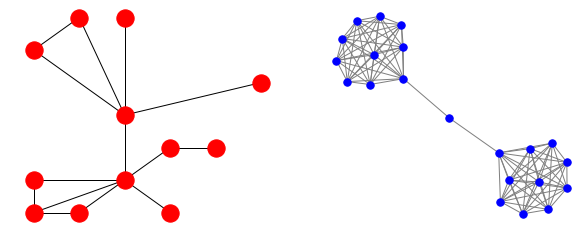

In [2]:
graph_nodes = pd.read_csv("Resources/graphs csv/vertices_niche_example.csv", sep=";")
graph_edges = pd.read_csv("Resources/graphs csv/edges_niche_example.csv", sep=";")

plt.figure(figsize=(10,4))

plt.subplot(121)
G = nx.Graph()
G.add_nodes_from(graph_nodes["id"])
G.add_edges_from([(graph_edges["u"][i], graph_edges["v"][i]) for i in range(len(graph_edges))])
nx.draw(G, pos = {graph_nodes["id"][i]:(graph_nodes["x"][i],graph_nodes["y"][i]) for i in range(len(graph_nodes))})

plt.subplot(122)
G = nx.barbell_graph(10,1)
nx.draw(G,nx.nx_agraph.graphviz_layout(G), node_size = 55, edge_color="gray", node_color = "b")
plt.show()

In this representation, every node is an abstraction of a person that is part of the social network in study, and the edges represent interactions or connections to individuals that could pottentially interact with each one of them. 

The <font color=red>**left image**</font> aims to make an example of how these interactions may happen on a small group of people, some of theme with significantly more and more diverse interactions than others, while the <font color="blue">**image on the right**</font> represents two closed fully connected circles of people that interact with each other via a carrier which may itself interact with other niches, representing a possible source of external exposure to a disease.

### Inital structure of a network
#### Ideas
- Evaluate the effectiveness of making a Control layer opposed to a Information layer
- Change the friends number distribution, uniform may not represent well the situation

In [3]:
def school_graph_generator(n, friendship_coef = .3):
    edges = np.zeros([n,n])
    ready_nodes = []
    active_node = np.random.randint(n)
    
    while True:
        if np.random.rand() < friendship_coef:
            friends = np.random.randint(5,9)
        else:
            friends = np.random.randint(0,5)
        
        frontier = []
        candidate_list = [i for i in range(n) if i not in ready_nodes and not i == active_node]
        while sum(edges[active_node,:] + edges[:,active_node]) < friends and len(candidate_list) > len(frontier):
            candidate = random.choice([i for i in candidate_list if i not in frontier])
            frontier.append(candidate)
            edges[active_node][candidate] = 1
        ready_nodes.append(active_node)
        
        if len(ready_nodes) == n:
            break
        else:
            active_node = random.choice(candidate_list)
    edge_list = []
    for i in range(n):
        for j in range(n):
            if not edges[i][j] == 0:
                edge_list.append((i,j))
                
    return_graph = nx.Graph()
    return_graph.add_nodes_from(range(n))
    return_graph.add_edges_from(edge_list)
    
    return return_graph

def convert_to_hex(rgba_color) :
    red = int(rgba_color[0]*255)
    green = int(rgba_color[1]*255)
    blue = int(rgba_color[2]*255)
    return '#%02x%02x%02x' % (red, green, blue)

def color_nodes(graph):
    plasma = plt.get_cmap('plasma') 
    cNorm  = colors.Normalize(vmin=1, vmax=9)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plasma)
    scalarMap.set_array([])
    plt.colorbar(scalarMap)
    
    color_list = []
    for node in graph.nodes:
        color_list.append(convert_to_hex(scalarMap.to_rgba(graph.degree[node])))
    return color_list


def display_graph(coef):
    plt.figure(figsize = (10,7))
    plt.title("Randomly generated school social network")
    school_graph = school_graph_generator(200, coef)
    nx.draw(school_graph,nx.nx_agraph.graphviz_layout(school_graph), node_size = 55, edge_color="gray",
            node_color = color_nodes(school_graph))
    plt.show()

coef_input = widgets.FloatSlider(value=.3, min=0, max=1, step=.05,
                                 description="Coefficient", orientation="horizontal",continuous_update=False)
widgets.interactive(display_graph, coef = coef_input)


interactive(children=(FloatSlider(value=0.3, continuous_update=False, description='Coefficient', max=1.0, step…

Acording to the research developed by [1], there are several variables involving each one of the individuals that influence the risk of getting a STD. Many of them are better modeled as parts of the simulation process that we'll cover later on, however, according to Youm and Laumann, *friendship networks* play a huge role in this situation. They stablished four types of friendship networks, **no friends, weak and large, small and strong, and a combination of the last two**, the threshold for whether someone has a big or small network is around 5 or 6 friends, and strong relations meaning at least talking to them once a day.

The interactive graph represents a randomly generated social network for a school of 200 students, changing the coefficient alters the ratio of people that has a bigger number of friends, hence a bigger social network.

<a href = "https://www.ncbi.nlm.nih.gov/pubmed/12438906">[1]</a> Youm, Y., & Laumann, E. O. (2002). Social Network Effects on the Transmission of Sexually Transmitted Diseases. Sexually Transmitted Diseases, 29(11), 689-697. 

### Evolution of a Social Network

## Appendix
#### Pygraphviz layout formats
Comparison between different layout programs

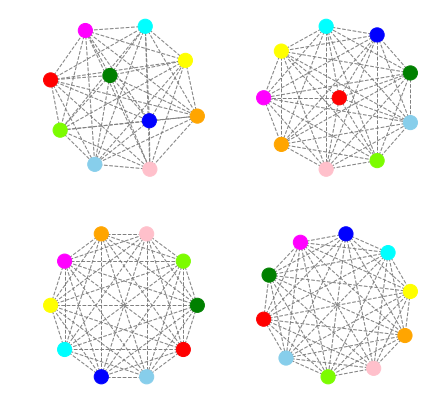

In [4]:
progs = ("neato", "twopi", "circo", "fdp")
ncolors = ("red", "green", "blue", "cyan", "yellow", "magenta", "orange", "pink", "lawngreen", "skyblue")

plt.figure(figsize = (7,7))
for i in range(len(progs)):
    plt.subplot(221 + i)
    G = nx.complete_graph(10)
    nx.draw(G, nx.nx_agraph.graphviz_layout(G, prog = progs[i]), node_size = 200, edge_color = "gray", style="dashed",
           node_color = ncolors)
    
plt.show()